# Loading Libraries

In [1]:
"""
Converted on Fri Jul 27 10:37:32 2018

@author: Atul
"""
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from load_data import *
import rpy2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

# Loading  Training and Test Data Sets from csv to dataFrame

In [2]:
train_data=pd.read_csv("./A1Benchmark/real_23.csv") #training data set1
train_data1=pd.read_csv("./A1Benchmark/real_24.csv")  #training data set2

test_data1=pd.read_csv("./A1Benchmark/real_18.csv") #Test data set1

# Selecting required columns 

In [3]:
x_train=train_data.iloc[:,(1)].values # selecting data values for training set1
y_train=train_data.iloc[:,2].values # selecting target class for training set1


x_train1=train_data1.iloc[:,(1)].values # selecting data values for training set2
y_train1=train_data1.iloc[:,2].values #selecting target class for training set2

x_test1=test_data1.iloc[:,(1)].values # selecting data values for test set1
y_test1=test_data1.iloc[:,2].values #selecting target class for test set1



# Reshaping selected dataframes

In [4]:
x_train=x_train.reshape(-1,1) #reshaping training set 1 because it contains onyl single feature
x_train1=x_train1.reshape(-1,1)# reshaping training set 2
x_test1=x_test1.reshape(-1,1) #reshaping test set 1

# Normalizing the Test and Training data between 0 and 1 // If necessary ////No need now

In [6]:
#min_max_scaler = preprocessing.MinMaxScaler()
#x_train1 = min_max_scaler.fit_transform(x_train1) # normalizing training set2
#x_test1 = min_max_scaler.fit_transform(x_test1) #normalizing test set 1

# Creating model for linear regression

In [5]:
clf=linear_model.LinearRegression()
clf.fit(x_train,y_train) #training model over training set1

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Re-Training the generated Model

In [6]:
import pickle
s = pickle.dumps(clf) #dumping the trained model over set1 into s
clf2 = pickle.loads(s) #This model will contain trained data and wil continue the same.
clf2.fit(x_train1,y_train1) #Training the Previously generated model over set2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
y_expect=y_test1
y_pred=clf2.predict(x_test1) #calculating predicted value

# Defining a Function for Rounding off the Predicted Values to 0 or 1

In [8]:
def r(i):
    if (i > 1.309 and i < 1.5): # Limits set for i after analyzing the Predicted values(y_pred) // for csv 18 and 49
        i =1
    elif (i < -0.19 or (i > 0.30 and i < 1)): # for csv 53
        i=1
    else:
         i=0
    return i    

In [9]:
y_pred_new=np.array([]) # initiating an empty numpy array for storing round off values from y_pred
for i in y_pred:
    y_pred_new=np.append(y_pred_new,(r(i)))

#for i in y_pred_new: #Uncomment this line to see predicted values
#    print(i)

# Importing Required libraries for Generating confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [11]:
results=confusion_matrix(y_expect,y_pred_new)
print("confusion_matrix")
print("\n",results)
print("\n\n accuracy_score:",accuracy_score(y_expect,y_pred_new)) # for printing accuracy
print('\n\n classification report\n\n',metrics.classification_report(y_expect,y_pred_new)) # for printing confusion matrix

confusion_matrix

 [[1458    0]
 [   0    3]]


 accuracy_score: 1.0


 classification report

              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1458
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00      1461



# Plotting of Time-Series Data along with anomalies

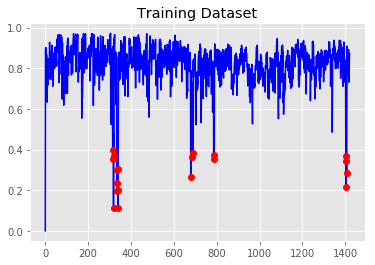

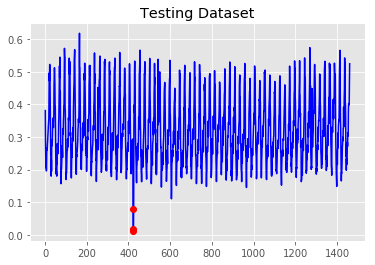

In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

train_data_anomaly_positions = train_data.loc[train_data['is_anomaly'] == 1,  ('timestamp','value')]
test_data_anomaly_positions = test_data1.loc[test_data1['is_anomaly'] == 1,  ('timestamp','value')]
fig = plt.figure(1)
plt.plot(train_data['timestamp'], train_data['value'], color="blue")
plt.title("Training Dataset")
plt.plot(train_data_anomaly_positions['timestamp'], train_data_anomaly_positions['value'], 'ro', color="red")

fig = plt.figure(2)
plt.plot(test_data1['timestamp'], test_data1['value'], color="blue")
plt.title("Testing Dataset")
plt.plot(test_data_anomaly_positions['timestamp'], test_data_anomaly_positions['value'], 'ro', color="red")

# Generating Model for Linear Regression 

   timestamp     value  is_anomaly
0          1  0.000000           0
1          2  0.892033           0
2          3  0.901426           0
3          4  0.902496           0
4          5  0.897662           0
   timestamp     value  is_anomaly
0          1  0.381389           0
1          2  0.290556           0
2          3  0.252778           0
3          4  0.206111           0
4          5  0.216111           0
         timestamp        value   is_anomaly
count  1420.000000  1420.000000  1420.000000
mean    710.500000     0.819815     0.013380
std     410.063003     0.103296     0.114937
min       1.000000     0.000000     0.000000
25%     355.750000     0.783908     0.000000
50%     710.500000     0.839665     0.000000
75%    1065.250000     0.879390     0.000000
max    1420.000000     0.972366     1.000000
         timestamp        value   is_anomaly
count  1461.000000  1461.000000  1461.000000
mean    731.000000     0.320808     0.002053
std     421.898685     0.102452     0.04

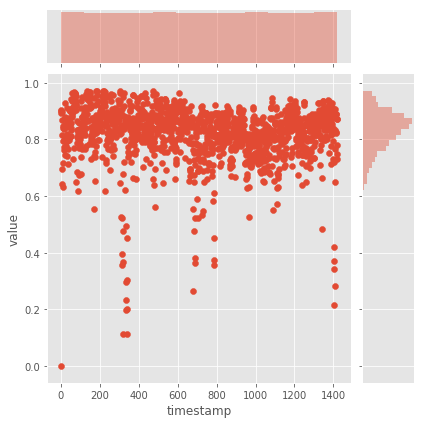

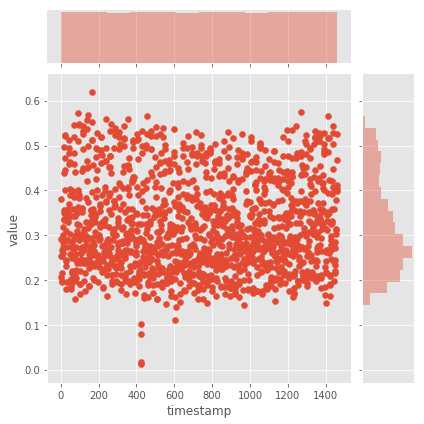

In [13]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

"""
    Created on Sep 4
    @author : WaVeRiDeR(Atul)
"""

print(train_data.head()) #Returns first 5 rows of Train_data
print(test_data1.head())  #Returns first 5 rows of Test_data

#Returns Descriptive Statistics that summarizes the central Tendency
print(train_data.describe())
print(test_data1.describe())

#Information of a DataFrames
print(train_data.info())
print(test_data1.info())

#Prints the Shape of a DataFrames
print(test_data1.shape)
print(train_data.shape)

#Droping of Missing Data
#test_data = test_data.dropna()
#train_data = train_data.dropna()

#Prints the Shape of a DataFrames after droping
print(test_data1.shape)
print(train_data.shape)

#Visualizing Train_data and Test_data
sns.jointplot(x = 'timestamp', y = 'value', data = train_data)
sns.jointplot(x = 'timestamp', y = 'value', data = test_data1)

#Creation of Linear Model Object
lm = LinearRegression()

#Slicing of Datasets
x_train = pd.DataFrame(train_data.iloc[:,0].values)
y_train = pd.DataFrame(train_data.iloc[:,1].values)

x_test = pd.DataFrame(test_data1.iloc[:,0].values)
y_test = pd.DataFrame(test_data1.iloc[:,1].values)

#Training the Model by training dataset
lm.fit(x_train,y_train)

#Prints the Accuracy of Model
accuracy = round(lm.score(x_train,y_train) *100,2)
print('Accuracy:', accuracy)

#Prints the Coefficients
print('Coefficients', lm.coef_)

#Estimated prediction of y_test values based on trained model
predictions = lm.predict(x_test)

# Plotting the Regression Line

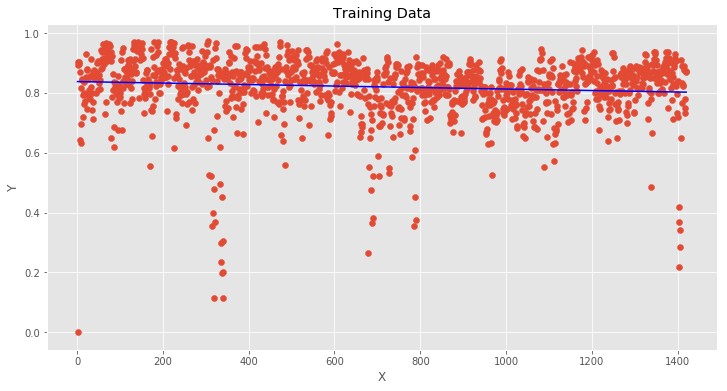

In [15]:
#Visualizing the Training Dataset
plt.figure(figsize = (12,6))
plt.scatter(x_train,y_train)
plt.plot(x_train,lm.predict(x_train), color = 'blue')
#plt.xlim(5)
#plt.ylim(2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')

# it is what gives the transparency to the points.
# if they suppose themselves, the colors are added.

plt.show()

Text(0.5, 1.0, 'R_values VS P_values')

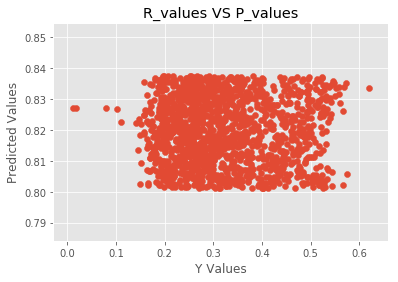

In [16]:
#Real Test Values Versus Predicted Test Values
plt.scatter(y_test,predictions)
plt.xlabel('Y Values')
plt.ylabel('Predicted Values')
plt.title('R_values VS P_values')

# Lets check the distribution of our Dataset

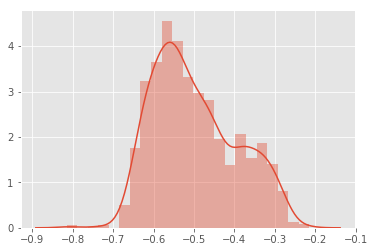

In [17]:
#Model was correct choice for data because of Normal distribution
sns.distplot((y_test-predictions))


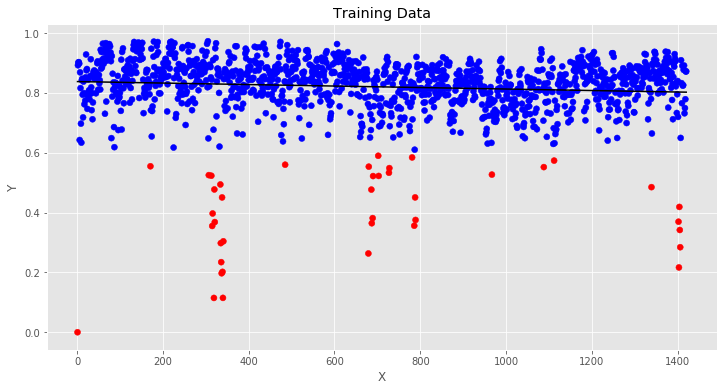

<Figure size 432x288 with 0 Axes>

In [18]:
#plt.plot(x_train,lm.predict(x_train), color = 'red')
plt.figure(figsize = (12,6))
cols = np.where(y_train[0]<=0.6,'r','b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.scatter(x=x_train,y=y_train,c=cols) #Pass on the list created by the function here
plt.plot(x_train,lm.predict(x_train), color = 'black')
plt.show()
plt.savefig("new.jpg")

# Visualizing the benchmark files (A2)

Check for any NULL value - 
timestamp     0
value         0
is_anomaly    0
dtype: int64
Total data instances in A2 Benchmark: 142100
Total anomaly instances in A2 Benchmark: 466
                        Max          Min          Mean           Std
synthetic_85    8210.758177 -1254.672335   2129.056749   1518.281126
synthetic_91  128420.057623   -93.303340  29558.600651  17617.490683
synthetic_46   12531.576868 -1231.851849   4883.689181   3003.235603
synthetic_52    8631.750691 -1820.080264   2685.056514   1851.799837
synthetic_53   22106.473333 -1266.218014   5334.901872   3433.340594


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


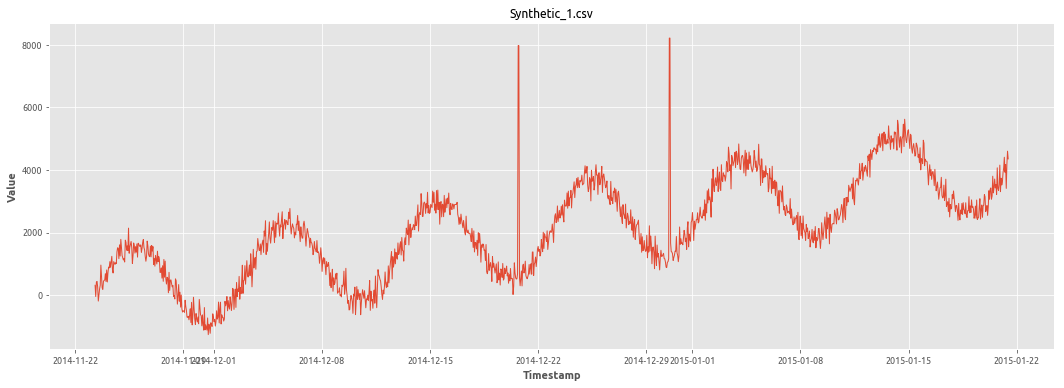

In [19]:
def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 11
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 9
    plt.rcParams['ytick.labelsize'] = 9
    plt.rcParams['legend.fontsize'] = 11
    plt.rcParams['figure.titlesize'] = 13

apply_styles()

path='../A2Benchmark/*.csv'
Benchmark = []

data_load(path, Benchmark)

check_null(Benchmark)

convert_to_date_time(Benchmark)

#set_index_df(Benchmark)

count_data_instance(Benchmark)

count_anomaly_instances(Benchmark)

labelled_anomaly_positions(Benchmark)

data_stat(Benchmark)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title("Synthetic_1.csv")
#Benchmark.plot(subplots=True, figsize=(10,12))
A2A = plt.plot(Benchmark[0]['timestamp'], Benchmark[0]['value'])
plt.savefig('synthetic_1.png')
plt.show(A2A)

## Working on ARIMA Model.
#### ARIMA Model on Yahoo Benchmark Dataset
### Adding all the A2 Datasets in One Frame

In [3]:
A2Apaths = ['./A2Benchmark/synthetic_1.csv', './A2Benchmark/synthetic_2.csv','./A2Benchmark/synthetic_3.csv','./A2Benchmark/synthetic_4.csv','./A2Benchmark/synthetic_5.csv'
,'./A2Benchmark/synthetic_6.csv','./A2Benchmark/synthetic_7.csv','./A2Benchmark/synthetic_8.csv','./A2Benchmark/synthetic_9.csv','./A2Benchmark/synthetic_10.csv'
          ,'./A2Benchmark/synthetic_10.csv','./A2Benchmark/synthetic_11.csv','./A2Benchmark/synthetic_12.csv','./A2Benchmark/synthetic_13.csv'
          ,'./A2Benchmark/synthetic_14.csv','./A2Benchmark/synthetic_15.csv','./A2Benchmark/synthetic_17.csv','./A2Benchmark/synthetic_18.csv','./A2Benchmark/synthetic_19.csv', './A2Benchmark/synthetic_20.csv','./A2Benchmark/synthetic_21.csv','./A2Benchmark/synthetic_22.csv','./A2Benchmark/synthetic_23.csv'
,'./A2Benchmark/synthetic_24.csv','./A2Benchmark/synthetic_25.csv','./A2Benchmark/synthetic_26.csv','./A2Benchmark/synthetic_27.csv','./A2Benchmark/synthetic_28.csv','./A2Benchmark/synthetic_29.csv', './A2Benchmark/synthetic_30.csv','./A2Benchmark/synthetic_31.csv','./A2Benchmark/synthetic_32.csv','./A2Benchmark/synthetic_33.csv'
,'./A2Benchmark/synthetic_34.csv','./A2Benchmark/synthetic_35.csv','./A2Benchmark/synthetic_36.csv','./A2Benchmark/synthetic_37.csv','./A2Benchmark/synthetic_38.csv','./A2Benchmark/synthetic_39.csv','./A2Benchmark/synthetic_40.csv','./A2Benchmark/synthetic_41.csv'
          ,'./A2Benchmark/synthetic_42.csv','./A2Benchmark/synthetic_43.csv','./A2Benchmark/synthetic_44.csv','./A2Benchmark/synthetic_45.csv'
          ,'./A2Benchmark/synthetic_46.csv','./A2Benchmark/synthetic_47.csv','./A2Benchmark/synthetic_48.csv', './A2Benchmark/synthetic_49.csv','./A2Benchmark/synthetic_50.csv','./A2Benchmark/synthetic_51.csv','./A2Benchmark/synthetic_52.csv'
,'./A2Benchmark/synthetic_53.csv','./A2Benchmark/synthetic_54.csv','./A2Benchmark/synthetic_55.csv','./A2Benchmark/synthetic_56.csv','./A2Benchmark/synthetic_57.csv'
          ,'./A2Benchmark/synthetic_58.csv','./A2Benchmark/synthetic_59.csv','./A2Benchmark/synthetic_60.csv','./A2Benchmark/synthetic_61.csv'
          ,'./A2Benchmark/synthetic_62.csv','./A2Benchmark/synthetic_63.csv']   
df = pd.concat(map(pd.read_csv, A2Apaths))

#### How many Anomalies are in total of A2 Benchmark?

In [4]:
df.head()
df.is_anomaly.sum()

294

#### Let's change the Datetime to readable format for eaasy visualization

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
#A2df.timestamp = A2df.timestamp.dt.tz_localize('UTC')

In [8]:
print(df['timestamp'].head(10))

0   2014-11-23 07:00:00
1   2014-11-23 08:00:00
2   2014-11-23 09:00:00
3   2014-11-23 10:00:00
4   2014-11-23 11:00:00
5   2014-11-23 12:00:00
6   2014-11-23 13:00:00
7   2014-11-23 14:00:00
8   2014-11-23 15:00:00
9   2014-11-23 16:00:00
Name: timestamp, dtype: datetime64[ns]


In [9]:
df.head()

,timestamp,value,is_anomaly
0,2014-11-23 07:00:00,13.894031,0
1,2014-11-23 08:00:00,33.578274,0
2,2014-11-23 09:00:00,88.933746,0
3,2014-11-23 10:00:00,125.389424,0
4,2014-11-23 11:00:00,152.962000,0


# Importing required libraries and functions

In [10]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Creating a New Dataframe with values and one without values.

In [11]:
#df.head()
newdf = df[['timestamp','value']]
newdf['timestamp'] = pd.to_datetime(newdf['timestamp'], unit='s')
#newdf.head()

#df with anomaly

dfano = df[['timestamp','is_anomaly']]
dfano['timestamp'] = pd.to_datetime(dfano['timestamp'],unit = 's')
dfano.head()

,timestamp,is_anomaly
0,2014-11-23 07:00:00,0
1,2014-11-23 08:00:00,0
2,2014-11-23 09:00:00,0
3,2014-11-23 10:00:00,0
4,2014-11-23 11:00:00,0


### Let's check the starting and ending dates available.

In [12]:
newdf['timestamp'].min(), newdf['timestamp'].max()

(Timestamp('2014-11-23 07:00:00'), Timestamp('2015-01-21 11:00:00'))

In [13]:
newdf.isnull().sum()

timestamp    0
value        0
dtype: int64

In [14]:
dfano.sort_values('timestamp').head()

,timestamp,is_anomaly
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0
0,2014-11-23 07:00:00,0


In [15]:
newdf = newdf.groupby('timestamp')['value'].sum().reset_index()
dfano = dfano.groupby('timestamp')['is_anomaly'].sum().reset_index()

In [16]:
dfano.head()
#newdf.head()

,timestamp,is_anomaly
0,2014-11-23 07:00:00,0
1,2014-11-23 08:00:00,0
2,2014-11-23 09:00:00,0
3,2014-11-23 10:00:00,0
4,2014-11-23 11:00:00,0


In [17]:
newdf = newdf.set_index('timestamp')
newdf.index

dfano = dfano.set_index('timestamp')
dfano.index

DatetimeIndex(['2014-11-23 07:00:00', '2014-11-23 08:00:00',
               '2014-11-23 09:00:00', '2014-11-23 10:00:00',
               '2014-11-23 11:00:00', '2014-11-23 12:00:00',
               '2014-11-23 13:00:00', '2014-11-23 14:00:00',
               '2014-11-23 15:00:00', '2014-11-23 16:00:00',
               ...
               '2015-01-21 02:00:00', '2015-01-21 03:00:00',
               '2015-01-21 04:00:00', '2015-01-21 05:00:00',
               '2015-01-21 06:00:00', '2015-01-21 07:00:00',
               '2015-01-21 08:00:00', '2015-01-21 09:00:00',
               '2015-01-21 10:00:00', '2015-01-21 11:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=1421, freq=None)

In [18]:
y = newdf['value'].resample('H').median()
#y = dfano['is_anomaly'].resample('H').mean()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dfano)
#print(dfano)

                     is_anomaly
timestamp                      
2014-11-23 07:00:00           0
2014-11-23 08:00:00           0
2014-11-23 09:00:00           0
2014-11-23 10:00:00           0
2014-11-23 11:00:00           0
2014-11-23 12:00:00           0
2014-11-23 13:00:00           0
2014-11-23 14:00:00           0
2014-11-23 15:00:00           0
2014-11-23 16:00:00           0
2014-11-23 17:00:00           0
2014-11-23 18:00:00           0
2014-11-23 19:00:00           0
2014-11-23 20:00:00           0
2014-11-23 21:00:00           0
2014-11-23 22:00:00           0
2014-11-23 23:00:00           0
2014-11-24 00:00:00           0
2014-11-24 01:00:00           0
2014-11-24 02:00:00           0
2014-11-24 03:00:00           0
2014-11-24 04:00:00           0
2014-11-24 05:00:00           0
2014-11-24 06:00:00           0
2014-11-24 07:00:00           0
2014-11-24 08:00:00           0
2014-11-24 09:00:00           0
2014-11-24 10:00:00           0
2014-11-24 11:00:00           0
2014-11-

# Anomalies Present during which time-frame?
### As we can see most of the anomalies are present during End of December 2014 and Starting of Jan 2015

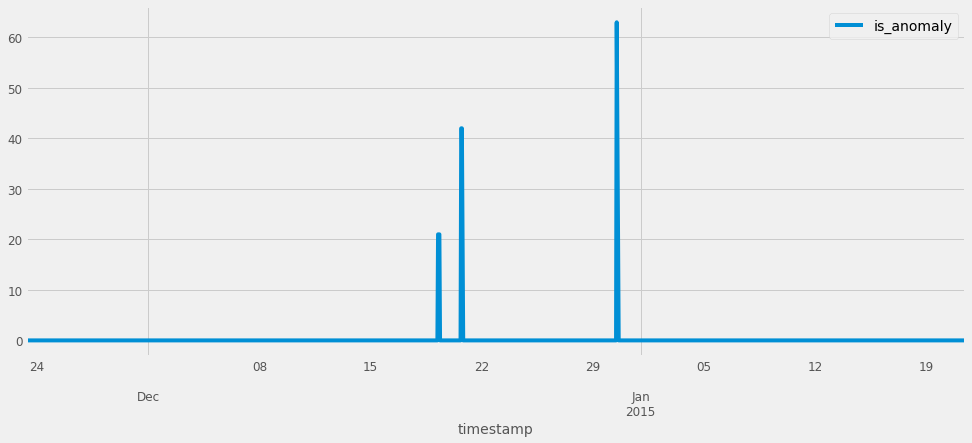

In [19]:
dfano.plot(figsize=(15, 6))
plt.show()

# Plotting Trends and Seasonality of Data.

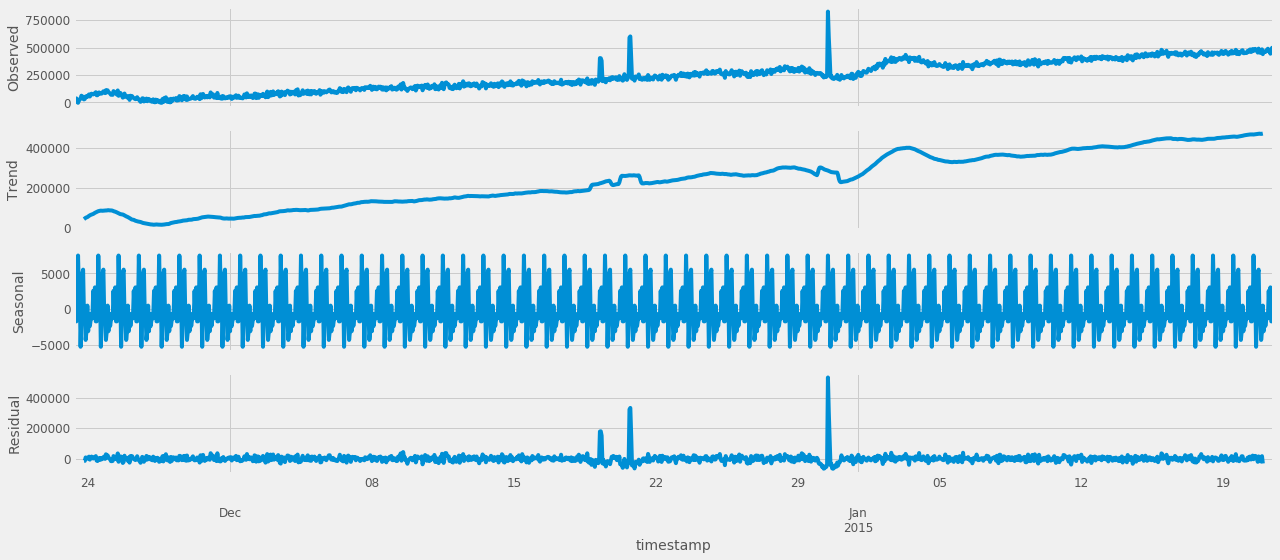

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Examples of parameter combinations for Seasonal ARIMA...

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Finding the best parameters of ARIMA
### The best param so far is ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:32764.2410727543 
#### So we will use this for the forecasting.

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:39612.5152726619
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:38354.784205169606
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:34039.61026229999
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:33404.16622608983
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:34064.844434927276
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:33648.57707022065
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:33517.29611458641
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:33404.116881098125
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:38587.78425393491
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:38030.6316661478
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:33695.03100454179
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:33017.59089490472
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:37922.07594313397
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:37861.67200363868
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:33185.440944489266
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:33019.05048900604
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:33276.411290365235
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:33005.11577277919
ARIMA(0

In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4729      0.032     15.011      0.000       0.411       0.535
ma.L1         -0.9146      0.017    -52.767      0.000      -0.949      -0.881
ar.S.L12      -0.0028      0.042     -0.065      0.948      -0.086       0.081
ma.S.L12      -0.9904      0.013    -74.710      0.000      -1.016      -0.964
sigma2       1.62e+09   4.15e-11    3.9e+19      0.000    1.62e+09    1.62e+09


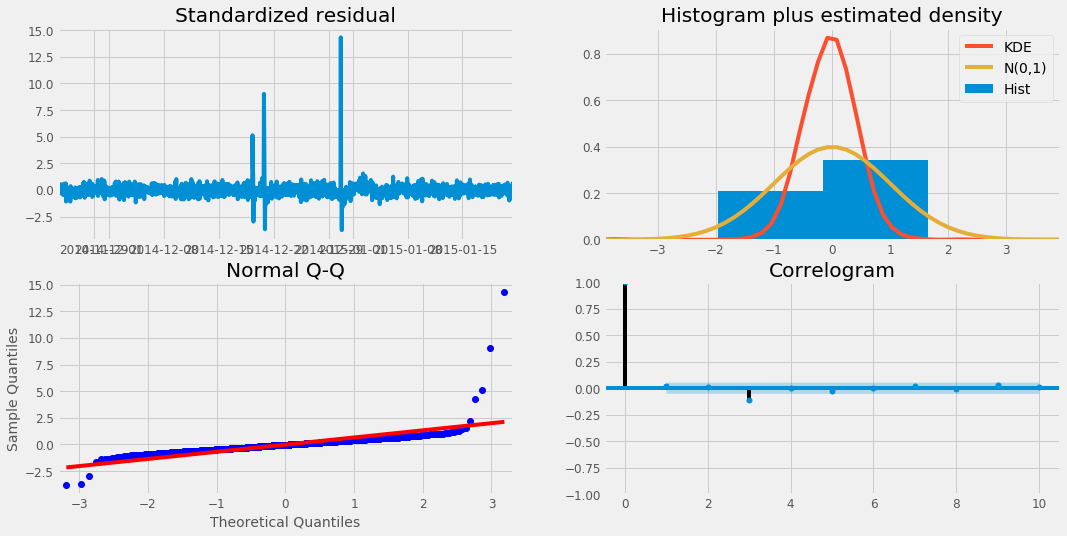

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

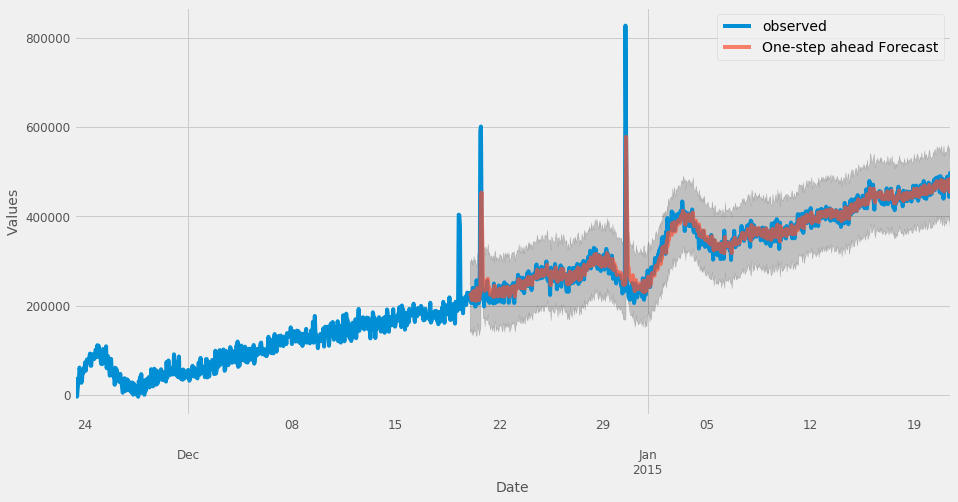

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2014-12-20'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()